In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tarfile

In [ ]:
file = tarfile.open('/content/drive/MyDrive/Augnito_Assignment/UrbanSound8K.tar.gz')
file.extractall('./')
file.close()

In [ ]:
df = pd.read_csv("/content/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
df['class'].nunique()

10

In [ ]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
classes = df.drop_duplicates(subset=['class', 'classID'])
c = classes[['classID','class']].sort_values(by='classID')
c = c.reset_index(drop=True)
c

,classID,class
0,0,air_conditioner
1,1,car_horn
2,2,children_playing
3,3,dog_bark
4,4,drilling
5,5,engine_idling
6,6,gun_shot
7,7,jackhammer
8,8,siren
9,9,street_music


<Axes: xlabel='classID', ylabel='count'>

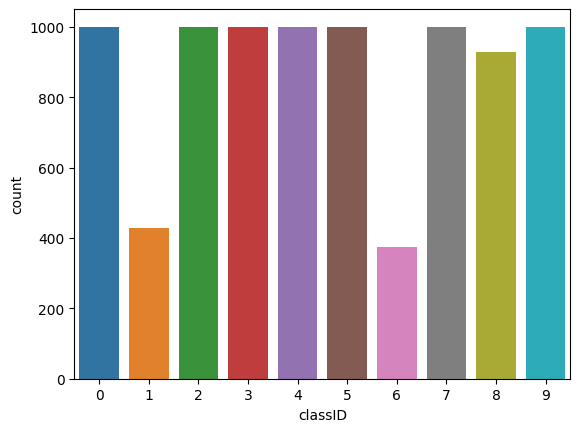

In [ ]:
sns.countplot(x='classID',data=df)

In [ ]:
df["path"] = "/content/UrbanSound8K/audio/fold"+df['fold'].astype(str)+"/"+df['slice_file_name'].astype(str)

In [ ]:
df1 = df[['path','classID','class']]
df1.head()

,path,classID,class
0,/content/UrbanSound8K/audio/fold5/100032-3-0-0...,3,dog_bark
1,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing
2,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing
3,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing
4,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing


getting the sample rates of all the files

In [ ]:
df1['sample_rate'] = df1['path'].apply(lambda x: librosa.get_samplerate(x))

In [ ]:
df1['sample_rate'].value_counts()

44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: sample_rate, dtype: int64

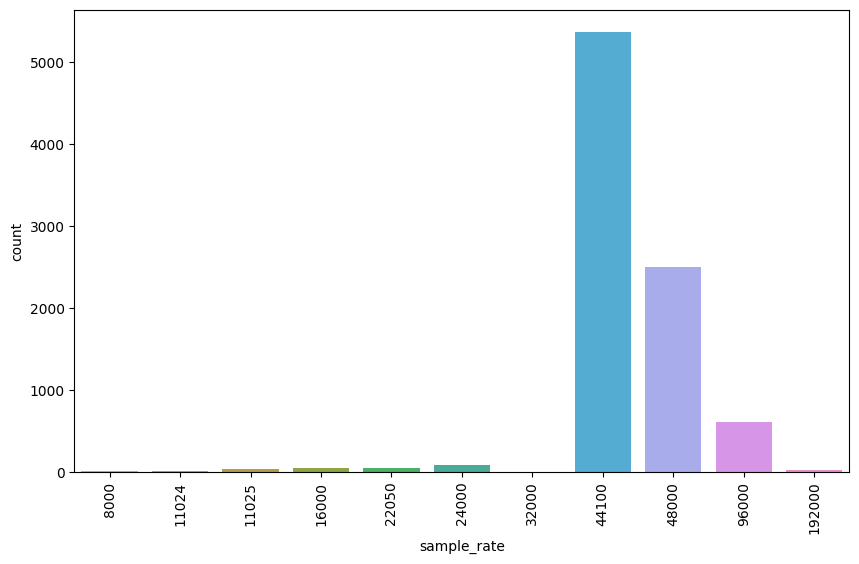

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sample_rate', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


getting the duration of each audio file

In [ ]:
df1['time_length'] = df1['path'].apply(lambda x: librosa.get_duration(path=x))

In [ ]:
df1.head()

,path,classID,class,sample_rate,time_length
0,/content/UrbanSound8K/audio/fold5/100032-3-0-0...,3,dog_bark,44100,0.317551
1,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
2,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
3,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
4,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000


In [ ]:
df1['time_length'].nunique()

973

In [ ]:
df1['time_length'].describe()

count    8732.000000
mean        3.607522
std         0.974394
min         0.050000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.036647
Name: time_length, dtype: float64

In [ ]:
df1['time_length'].value_counts().sort_values(ascending=False)

4.000000    7325
1.330000      10
1.440000      10
1.090000       9
1.020000       7
            ... 
1.279116       1
0.997120       1
1.585147       1
0.969025       1
3.505986       1
Name: time_length, Length: 973, dtype: int64

In [ ]:
df1.drop_duplicates()

,path,classID,class,sample_rate,time_length
0,/content/UrbanSound8K/audio/fold5/100032-3-0-0...,3,dog_bark,44100,0.317551
1,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
2,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
3,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
4,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,children_playing,44100,4.000000
...,...,...,...,...,...
8727,/content/UrbanSound8K/audio/fold7/99812-1-2-0.wav,1,car_horn,44100,4.000000
8728,/content/UrbanSound8K/audio/fold7/99812-1-3-0.wav,1,car_horn,44100,2.140000
8729,/content/UrbanSound8K/audio/fold7/99812-1-4-0.wav,1,car_horn,44100,3.505986
8730,/content/UrbanSound8K/audio/fold7/99812-1-5-0.wav,1,car_horn,44100,2.530000


In [ ]:
unique_rows = df1.groupby('class').first().reset_index()
unique_rows

,class,path,classID,sample_rate,time_length
0,air_conditioner,/content/UrbanSound8K/audio/fold5/100852-0-0-0...,0,44100,4.000000
1,car_horn,/content/UrbanSound8K/audio/fold10/100648-1-0-...,1,44100,0.648526
2,children_playing,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,2,44100,4.000000
3,dog_bark,/content/UrbanSound8K/audio/fold5/100032-3-0-0...,3,44100,0.317551
4,drilling,/content/UrbanSound8K/audio/fold3/103199-4-0-0...,4,44100,4.000000
5,engine_idling,/content/UrbanSound8K/audio/fold10/102857-5-0-...,5,44100,4.000000
6,gun_shot,/content/UrbanSound8K/audio/fold1/102305-6-0-0...,6,44100,2.610000
7,jackhammer,/content/UrbanSound8K/audio/fold1/103074-7-0-0...,7,48000,4.000000
8,siren,/content/UrbanSound8K/audio/fold7/102853-8-0-0...,8,44100,4.000000
9,street_music,/content/UrbanSound8K/audio/fold7/101848-9-0-0...,9,44100,4.000000


ploting the signal,spectrogram and mel spectrogram

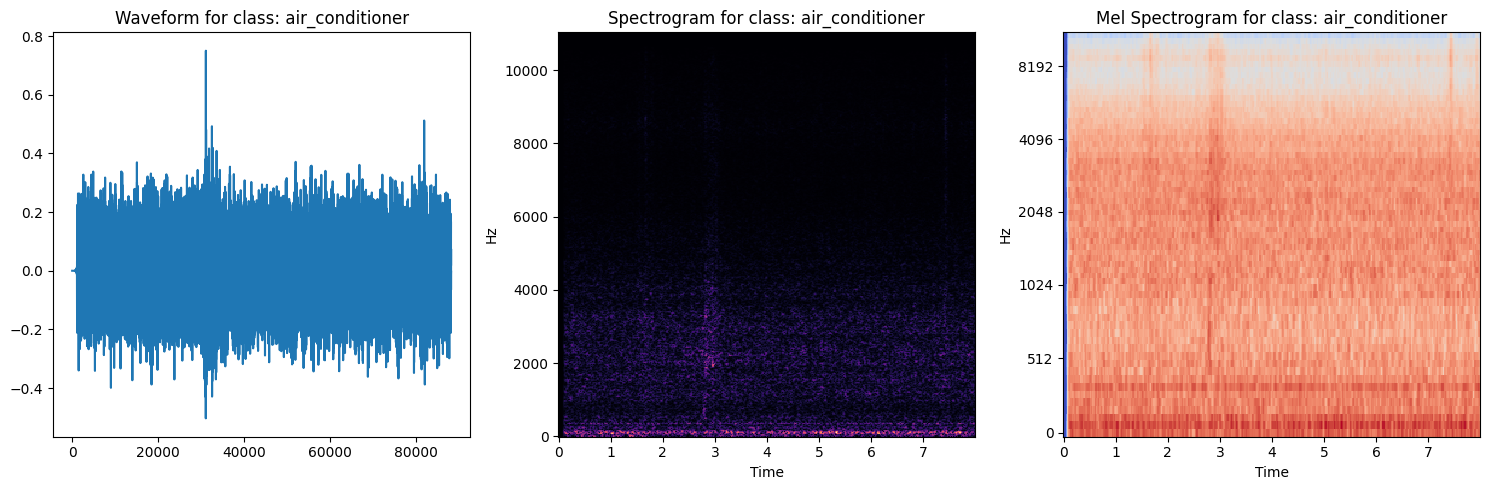

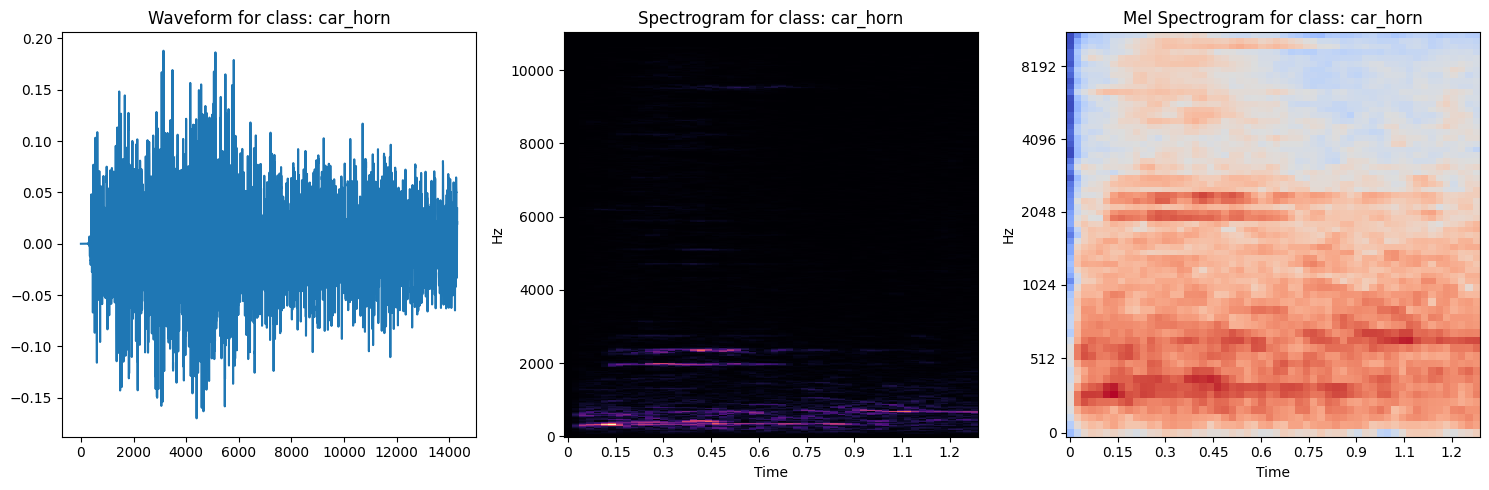

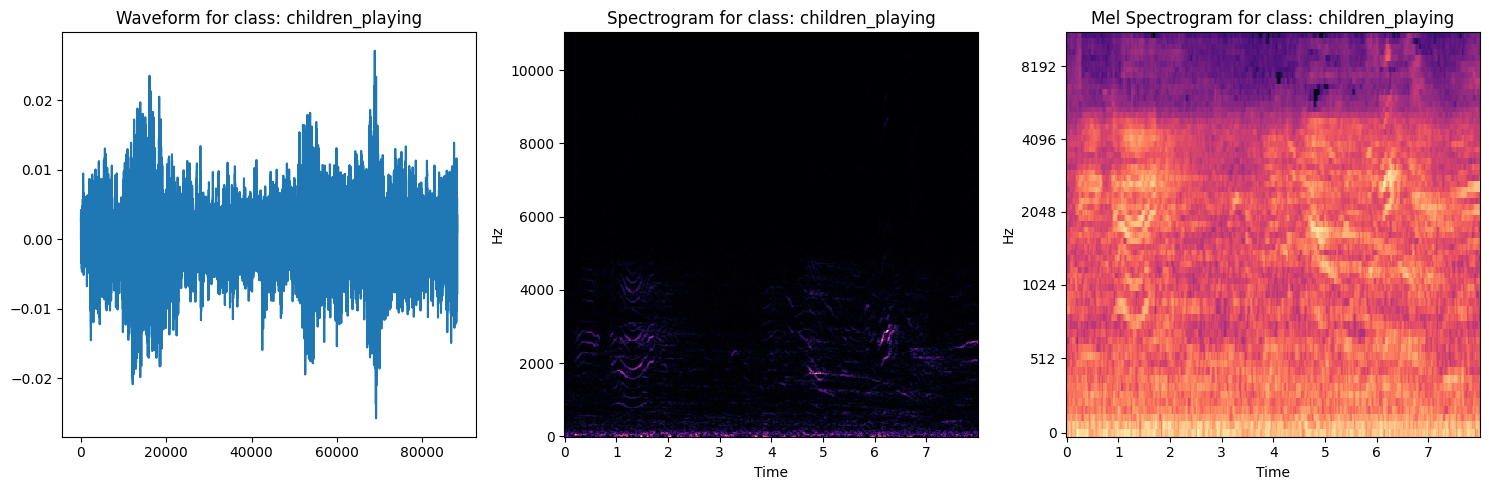

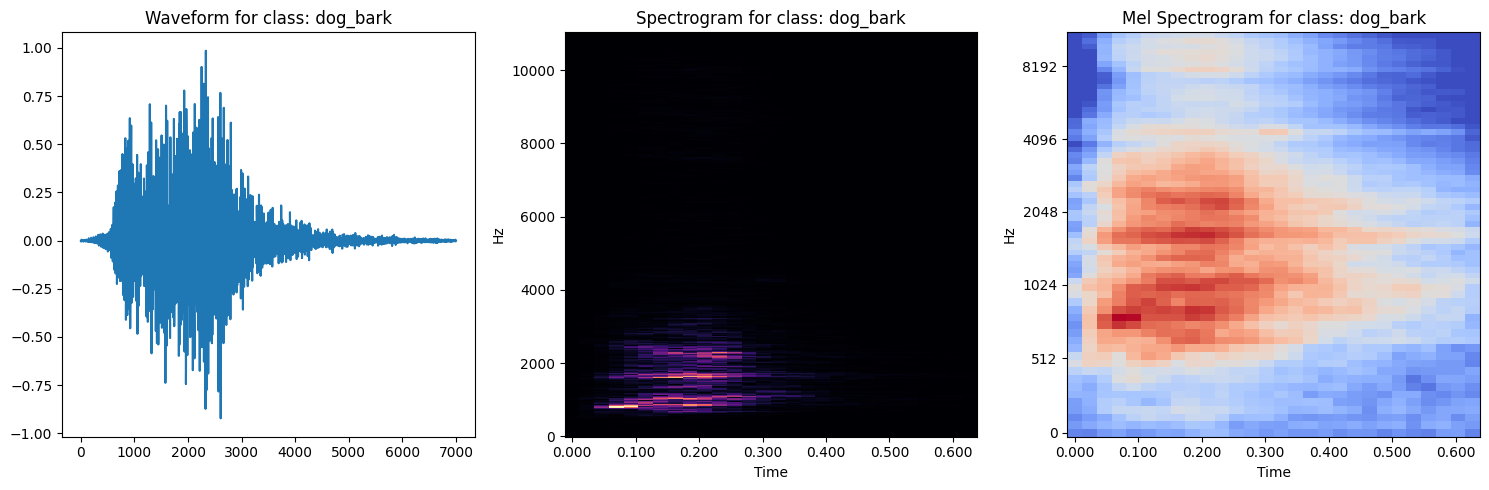

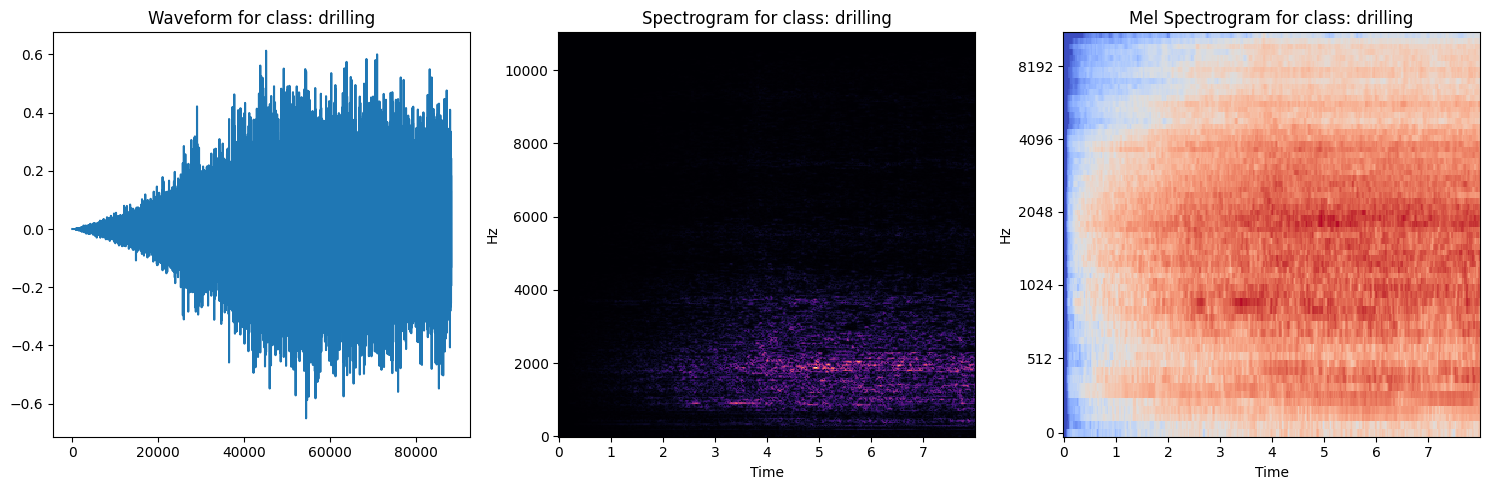

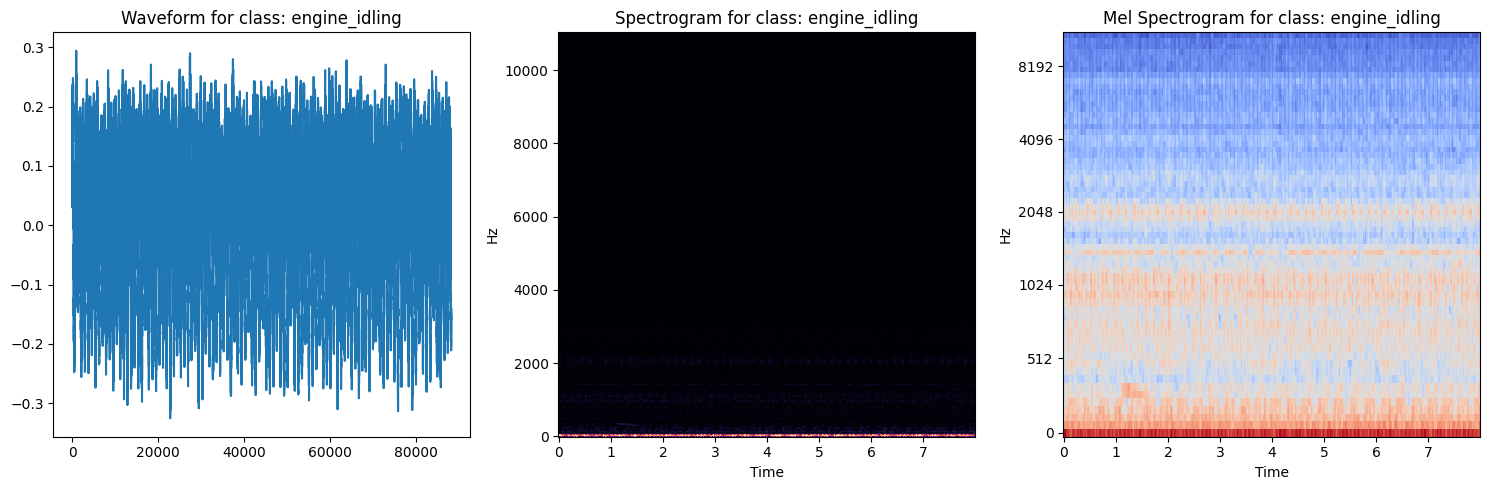

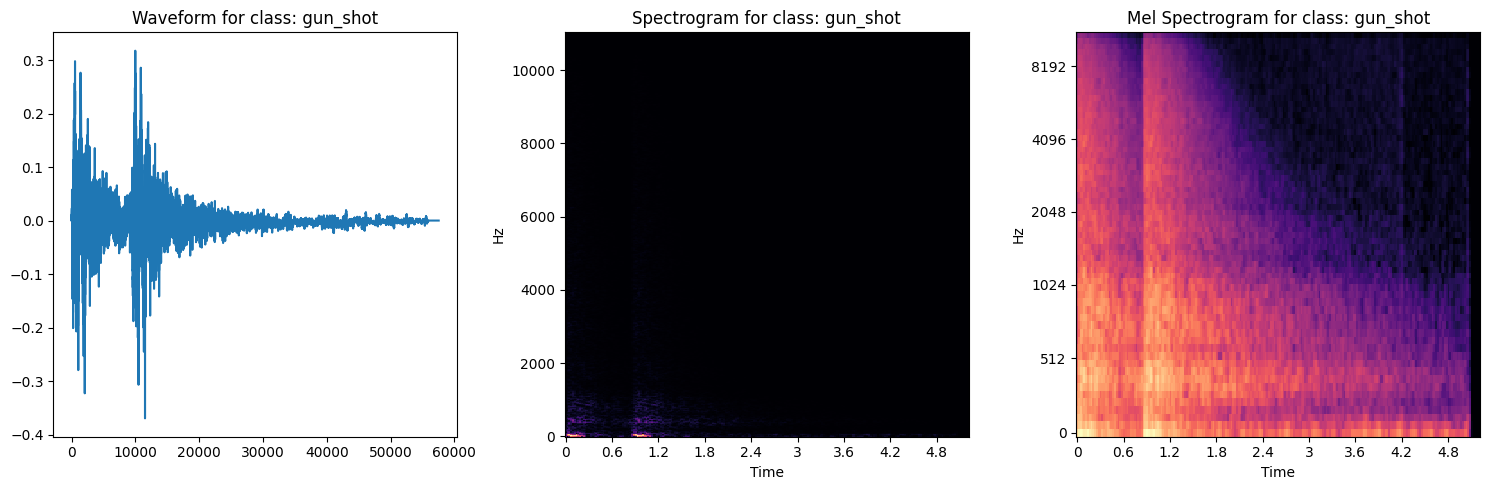

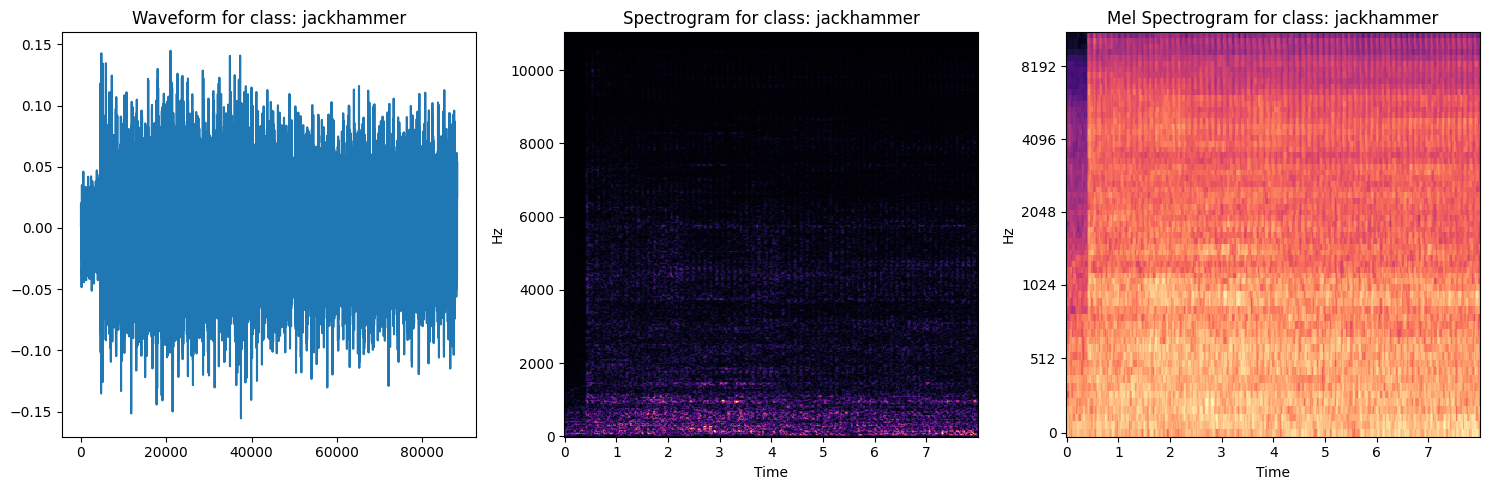

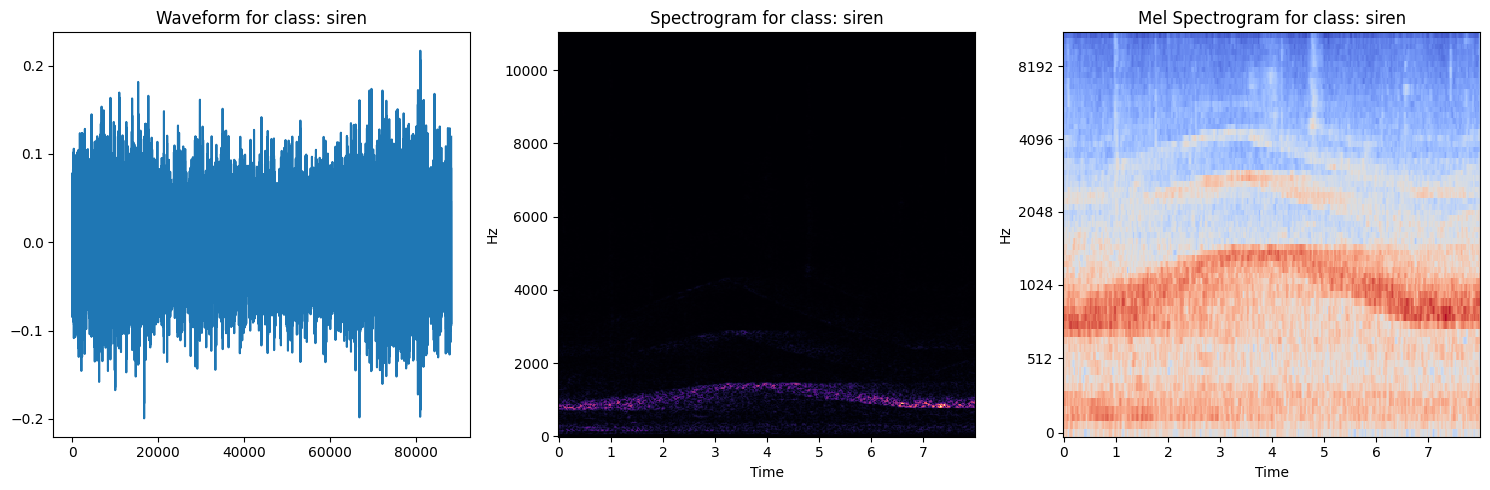

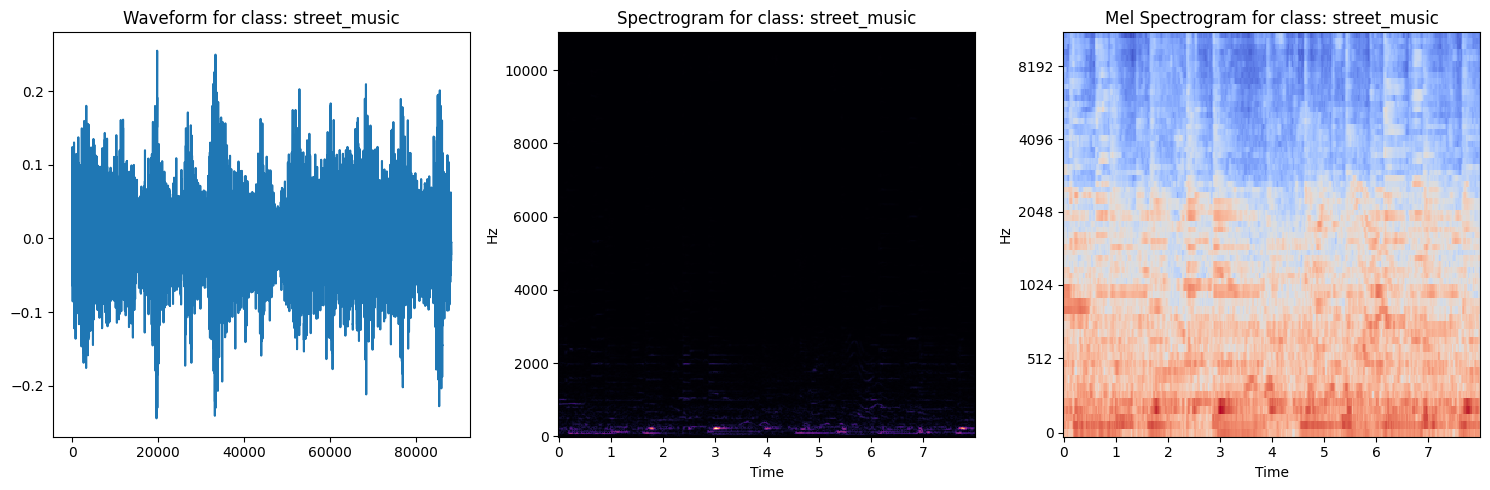

In [ ]:
for index, row in unique_rows.iterrows():
    path = row['path']
    class_name = row['class']

    signal,sr = librosa.load(path)
    # print(class_name)
    # librosa.display.waveshow(signal,sr=sr)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    ax1.plot(signal)
    ax1.set_title("Waveform for class: {}".format(class_name))
    S = librosa.core.stft(signal, n_fft=1024, hop_length=None)
    spectrogram = np.abs(S)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear', ax=ax2)
    ax2.set_title("Spectrogram for class: {}".format(class_name))

    spectrogram = librosa.feature.melspectrogram(y=signal,sr=sr,n_fft=1024,hop_length=None,n_mels=64)
    spec_db = librosa.power_to_db(spectrogram,top_db=80)
    librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='mel', ax=ax3)
    ax3.set_title("Mel Spectrogram for class: {}".format(class_name))
    fig.tight_layout()
    plt.show()

